# Linear Regression

In [46]:
using CSV

In [47]:
dataset = CSV.read("sales.csv")

,Promote,Sales
,Int64,Int64
1,23,554
2,56,1339
3,34,815
4,25,609
5,67,1600
6,82,2000
7,46,1000
8,14,300
9,6,150


In [48]:
X = dataset[:Promote]
Y = dataset[:Sales]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[48]:1
└ @ Core In[48]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[48]:2
└ @ Core In[48]:2


19-element Array{Int64,1}:
  554
 1339
  815
  609
 1600
 2000
 1000
  300
  150
 1150
 1200
 2000
 1750
 2000
 1500
 1000
 1600
 2000
  550

In [49]:
using Plots

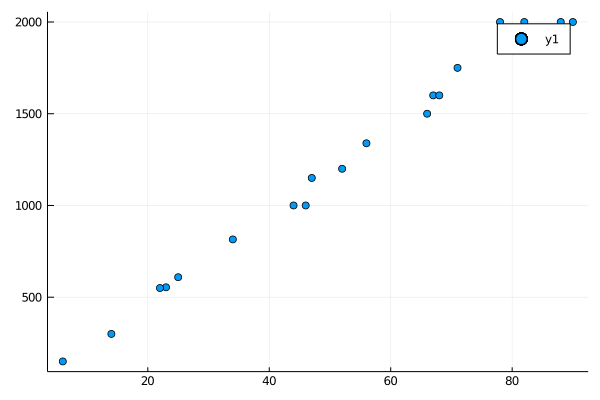

In [50]:
scatter(dataset.Promote, dataset.Sales)

# Method 1

$$ \Large y = c + mx $$

$$ \Large m = \frac{\Sigma({x - \bar{x}}) ({y - \bar{y}}) }{ \Sigma({x - \bar{x}})^2} $$

$$ \Large c = \bar{y} - m \bar{x} $$

In [51]:
using Statistics

In [52]:
m = sum((X .- mean(X)) .* (Y .- mean(Y))) / sum((X .- mean(X)) .* (X .- mean(X)))
c = mean(Y) - m .* mean(X);

In [53]:
m , c

(23.50640302155077, 5.485865363252515)

In [54]:
Sales = 23.5 * promote + 5.48

MethodError: MethodError: no method matching *(::Float64, ::typeof(promote))
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(::Float64, !Matched::Float64) at float.jl:405
  *(::AbstractFloat, !Matched::Bool) at bool.jl:112
  ...

In [55]:
 23.5 * 50 + 5.48

1180.48

# Method 2

In [56]:
names(dataset)

2-element Array{String,1}:
 "Promote"
 "Sales"

In [57]:
using GLM

In [58]:
ols = lm(@formula(Sales ~ Promote) , dataset)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Sales ~ 1 + Promote

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   5.48587   34.718      0.16    0.8763   -67.7627    78.7344
Promote      23.5064     0.606353  38.77    <1e-17    22.2271    24.7857
────────────────────────────────────────────────────────────────────────

In [59]:
using DataFrames

In [60]:
predict(ols, DataFrame(Promote= [50]))

1-element Array{Union{Missing, Float64},1}:
 1180.806016440791

# Multiple Linear Regression

In [61]:
s2 = CSV.read("salary.csv")

,Salary,Years_Previous_Experience,Years_Employed,Years_Education,Gender,Department
,Int64,Int64,Int64,Int64,String,String
1,32782,1,0,7,Male,A
2,32920,3,15,9,Female,A
3,29548,6,5,1,Male,A
4,39828,6,18,5,Female,A
5,31528,11,3,3,Male,A
6,38985,7,18,9,Male,A
7,41889,16,22,7,Male,A
8,38791,4,21,5,Male,A
9,28985,1,0,4,Female,A


In [62]:
names(s2)

7-element Array{String,1}:
 "Salary"
 "Years_Previous_Experience"
 "Years_Employed"
 "Years_Education"
 "Gender"
 "Department"
 "Number_Supervised"

y = m0x0 + m1x1 + m2x2 + c

In [63]:
ols2 = lm(@formula(Salary ~ Years_Previous_Experience + Years_Employed + Years_Education + Gender ) , s2)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + Years_Previous_Experience + Years_Employed + Years_Education + Gender

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)                23167.1      2072.0    11.18    <1e-13   18982.6   27351.6
Years_Previous_Experience   -114.747     239.075  -0.48    0.6338    -597.57    368.075
Years_Employed               656.497     144.942   4.53    <1e-4      363.78    949.214
Years_Education             1903.99      386.932   4.92    <1e-4     1122.56   2685.41
Gender: Male                1468.1      1804.27    0.81    0.4205   -2175.69   5111.9
─────────────────────────────────

In [64]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education  = [12], Gender =["Male"]))

1-element Array{Union{Missing, Float64},1}:
 51504.78590840764

In [65]:
predict(ols2, DataFrame(Years_Previous_Experience = [5], Years_Employed = [7], Years_Education  = [12], Gender =["Female"]))

1-element Array{Union{Missing, Float64},1}:
 50036.68417086605

In [66]:
predict(ols2, DataFrame(Years_Previous_Experience = [5 , 4], Years_Employed = [7 , 9], Years_Education  = [12, 15], Gender =["Male", "Female"]))

2-element Array{Union{Missing, Float64},1}:
 51504.78590840764
 57176.38183377373